In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

In [ ]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)
  
  for i in range(n):  
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()



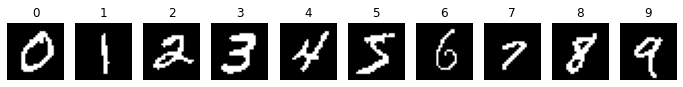

In [ ]:
filelist = glob.glob('images/*mnist*')
digits = []
labels = []
for path in filelist: 
    dig = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    _,thresh = cv2.threshold(dig,127,255,cv2.THRESH_BINARY)
    digits.append(thresh)
    labels.append(path[-5])
plot_sidebyside(digits,labels,colormap='gray')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


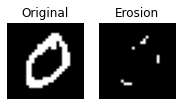

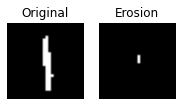

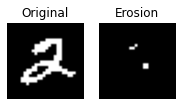

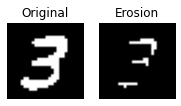

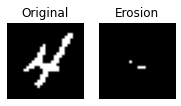

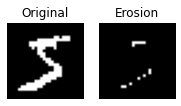

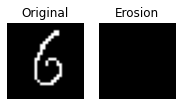

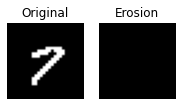

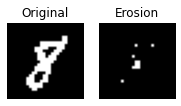

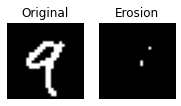

In [ ]:
kernel = np.ones((3,3))
print(kernel)
for img in digits:    
    im_erode = cv2.erode(img,kernel)
    plot_sidebyside([img,im_erode],['Original','Erosion'],colormap='gray',figsize=(3,2))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


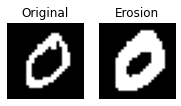

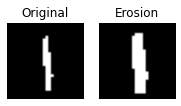

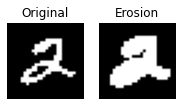

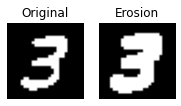

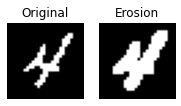

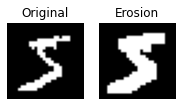

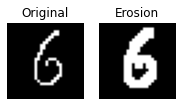

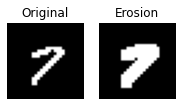

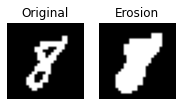

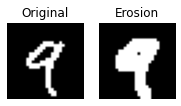

In [ ]:
kernel = np.ones((3,3))
print(kernel)
for img in digits:    
    im_erode = cv2.dilate(img,kernel)
    plot_sidebyside([img,im_erode],['Original','Erosion'],colormap='gray',figsize=(3,2))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


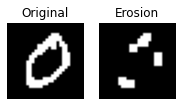

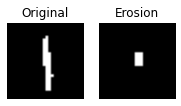

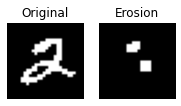

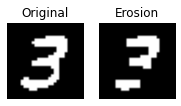

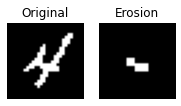

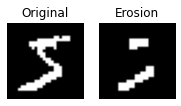

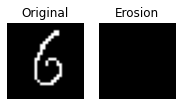

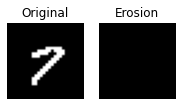

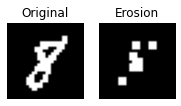

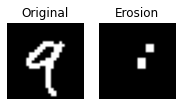

In [ ]:
kernel = np.ones((3,3))
print(kernel)

def morf_closing(img,kernel):
    im_erode = cv2.erode(img,kernel)
    im_close = cv2.dilate(im_erode,kernel)
    return im_close

for img in digits:    
    im_close = morf_closing(img,kernel)
    plot_sidebyside([img,im_close],['Original','Erosion'],colormap='gray',figsize=(3,2))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


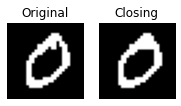

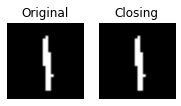

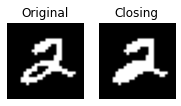

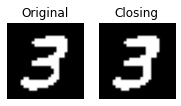

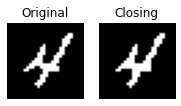

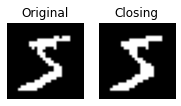

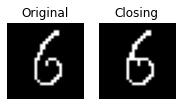

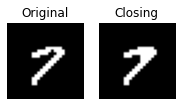

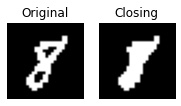

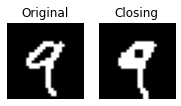

In [ ]:
kernel = np.ones((3,3))
print(kernel)

def morf_opening(img,kernel):
    im_dilate = cv2.dilate(img,kernel)
    im_open = cv2.erode(im_dilate,kernel)
    return im_open

for img in digits:    
    im_open = morf_opening(img,kernel)    
    plot_sidebyside([img,im_open],['Original','Closing'],colormap='gray',figsize=(3,2))

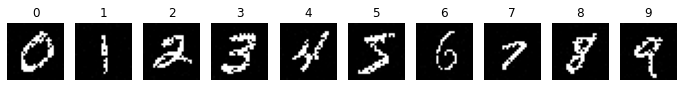

In [ ]:
#Adding some noise
noisy_digits = []
for img in digits:
    im = np.zeros(img.shape, np.uint8) # do not use original image it overwrites the image
    mean = -5
    sigma = 5
    noisy = cv2.randn(im,mean,sigma) # create the random distribution
    noisy = img + noisy
    noisy_digits.append(noisy)
plot_sidebyside(noisy_digits,labels,colormap='gray')

[[1. 1.]
 [1. 1.]]


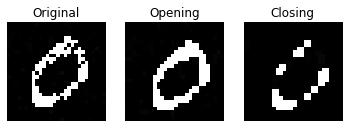

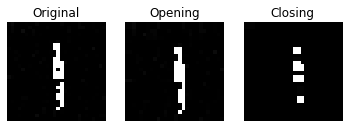

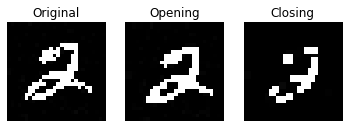

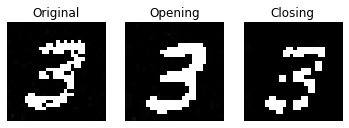

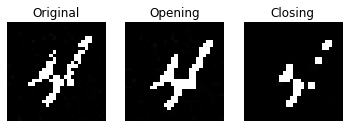

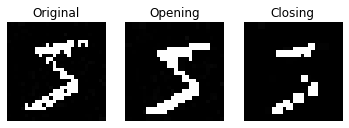

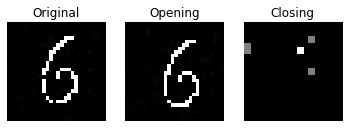

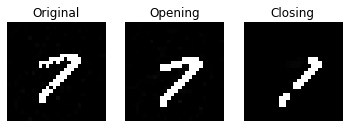

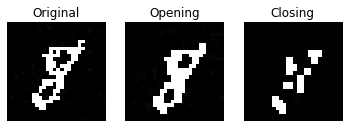

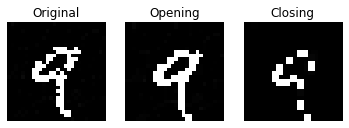

In [ ]:
kernel = np.ones((2,2))
print(kernel)
for img in noisy_digits:        
    im_open = morf_opening(img,kernel)
    im_close = morf_closing(img,kernel)    
    plot_sidebyside([img,im_open,im_close],['Original','Opening','Closing'],colormap='gray',figsize=(6,4))

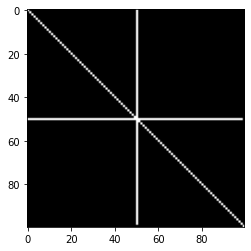

In [ ]:
im = np.zeros((100,100))

for x in range(99):
    #vertical
    im[x][50] = 255
    
    #horizontal
    im[50][x] = 255
    

im = cv2.line(im,(0,0),(99,99),(255,255,255),thickness=1)
    
plt.imshow(im,cmap='gray')
plt.show()

[[1]
 [1]
 [1]]


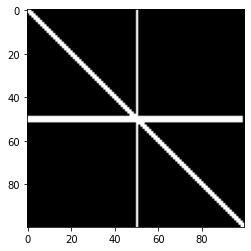

In [ ]:
kernel = np.array([[1],
                   [1],
                   [1]],                   
                   dtype=np.uint8)


print(kernel)
erode = cv2.dilate(im, kernel)
plt.imshow(erode,cmap='gray')
plt.show()